 STEP 1: Load Data & Understand Structure

In [6]:
import pandas as pd

# Load dataset
df = pd.read_csv("Crop Recommendation using Soil Properties and Weather Prediction (1).csv")

# Preview structure
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (3867, 29)


,Soilcolor,Ph,K,P,N,Zn,S,QV2M-W,QV2M-Sp,QV2M-Su,...,PRECTOTCORR-W,PRECTOTCORR-Sp,PRECTOTCORR-Su,PRECTOTCORR-Au,WD10M,GWETTOP,CLOUD_AMT,WS2M_RANGE,PS,label
0,Yellowish brown,5.81,738.231,5.401,0.23,2.976000,13.816,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
1,Yellowish brown,5.43,606.382,10.478,0.23,3.077000,16.421,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
2,brown,5.41,386.580,6.847,0.23,6.611000,16.557,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
3,red,5.65,207.086,3.418,0.23,0.460181,16.075,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley
4,red,5.27,317.357,39.282,0.23,2.743000,12.558,7.993333,10.456667,11.963333,...,2.073333,5.27,12.303333,5.27,3.44,0.73,56.57,6.24,77.03,Barley


STEP 2: Check Data Types & Missing Values

In [7]:
# Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Soilcolor       3867 non-null   object 
 1   Ph              3867 non-null   float64
 2   K               3867 non-null   float64
 3   P               3867 non-null   float64
 4   N               3867 non-null   float64
 5   Zn              3867 non-null   float64
 6   S               3867 non-null   float64
 7   QV2M-W          3867 non-null   float64
 8   QV2M-Sp         3867 non-null   float64
 9   QV2M-Su         3867 non-null   float64
 10  QV2M-Au         3867 non-null   float64
 11  T2M_MAX-W       3867 non-null   float64
 12  T2M_MAX-Sp      3867 non-null   float64
 13  T2M_MAX-Su      3867 non-null   float64
 14  T2M_MAX-Au      3867 non-null   float64
 15  T2M_MIN-W       3867 non-null   float64
 16  T2M_MIN-Sp      3867 non-null   float64
 17  T2M_MIN-Su      3867 non-null   f

In [8]:
# Count missing values in each column
missing = df.isnull().sum()
missing[missing > 0]

Series([], dtype: int64)

In [9]:
# View % of missing per column
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent[missing_percent > 0].sort_values(ascending=False)

Series([], dtype: float64)

STEP 3: Univariate Analysis of Features (1-by-1 distributions)

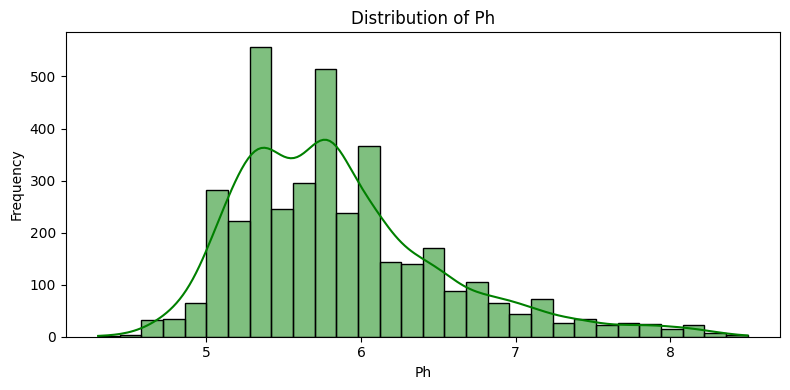

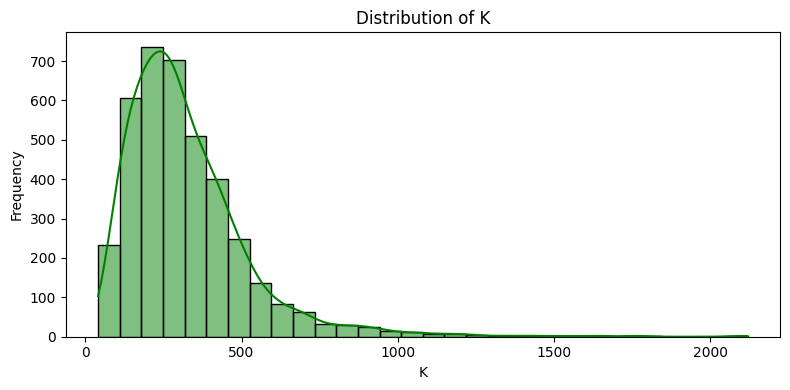

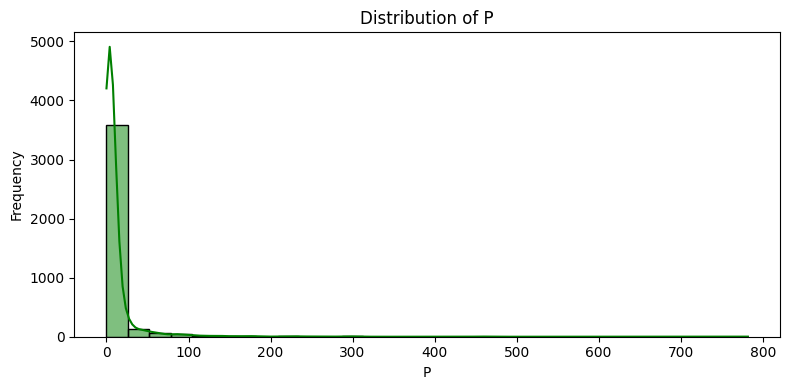

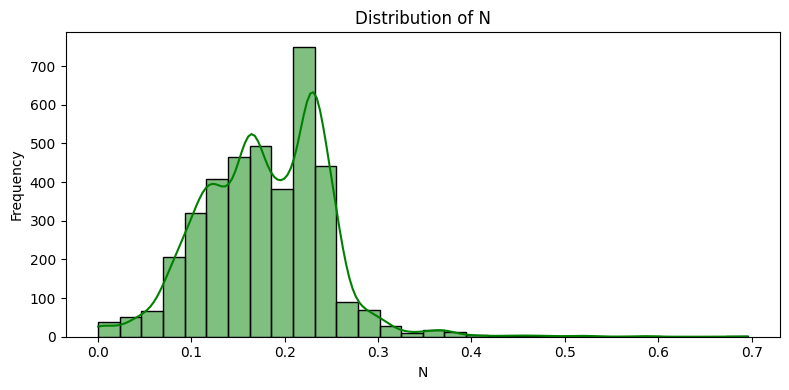

In [10]:
# Plot Histograms for soil features

import matplotlib.pyplot as plt
import seaborn as sns

soil_features = ["Ph", "K", "P", "N"]

for col in soil_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='green')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


In [11]:
df[soil_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Ph,3867.0,5.857295,0.676690,4.300000,5.3900,5.780000,6.20,8.5000
K,3867.0,324.284770,202.250133,41.134000,191.0000,282.000000,405.00,2119.0000
P,3867.0,11.349588,34.141864,0.000000,2.0000,4.000000,7.92,782.0000
N,3867.0,0.179153,0.066476,0.000262,0.1312,0.179884,0.23,0.6956


STEP 4: Univariate Analysis of Seasonal Weather Features

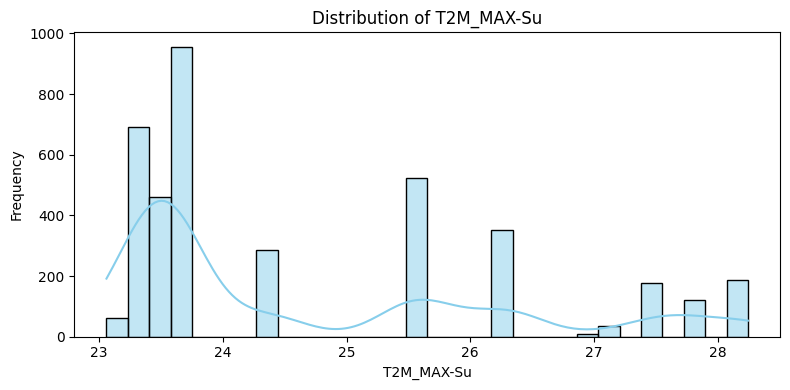

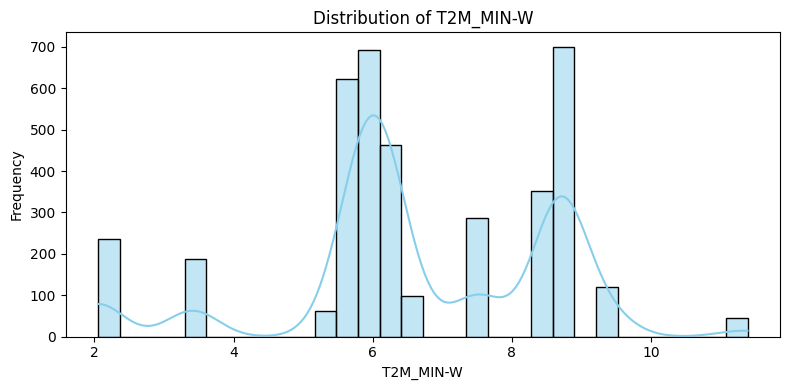

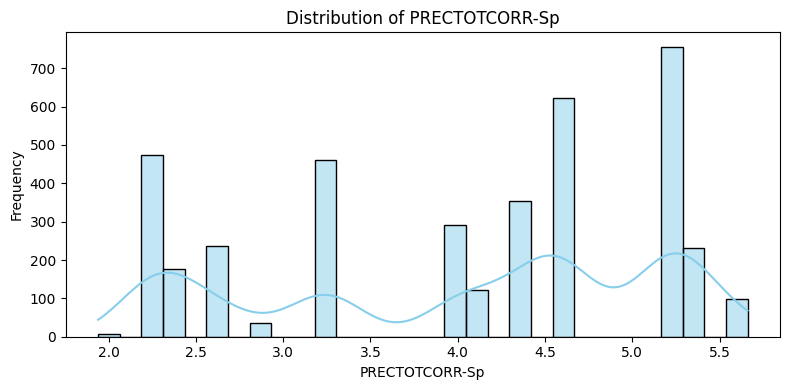

In [12]:
# Plot Histograms for weather features

weather_features = ["T2M_MAX-Su", "T2M_MIN-W", "PRECTOTCORR-Sp"]

for col in weather_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


In [13]:
df[weather_features].describe().T

,count,mean,std,min,25%,50%,75%,max
T2M_MAX-Su,3867.0,24.686049,1.585957,23.060000,23.533333,23.650000,25.643333,28.243333
T2M_MIN-W,3867.0,6.658860,1.933357,2.053333,5.760000,6.253333,8.533333,11.390000
PRECTOTCORR-Sp,3867.0,4.023404,1.117531,1.940000,3.246667,4.410000,5.203333,5.660000


STEP 5: Correlation Heatmap — Explore Feature Relationships

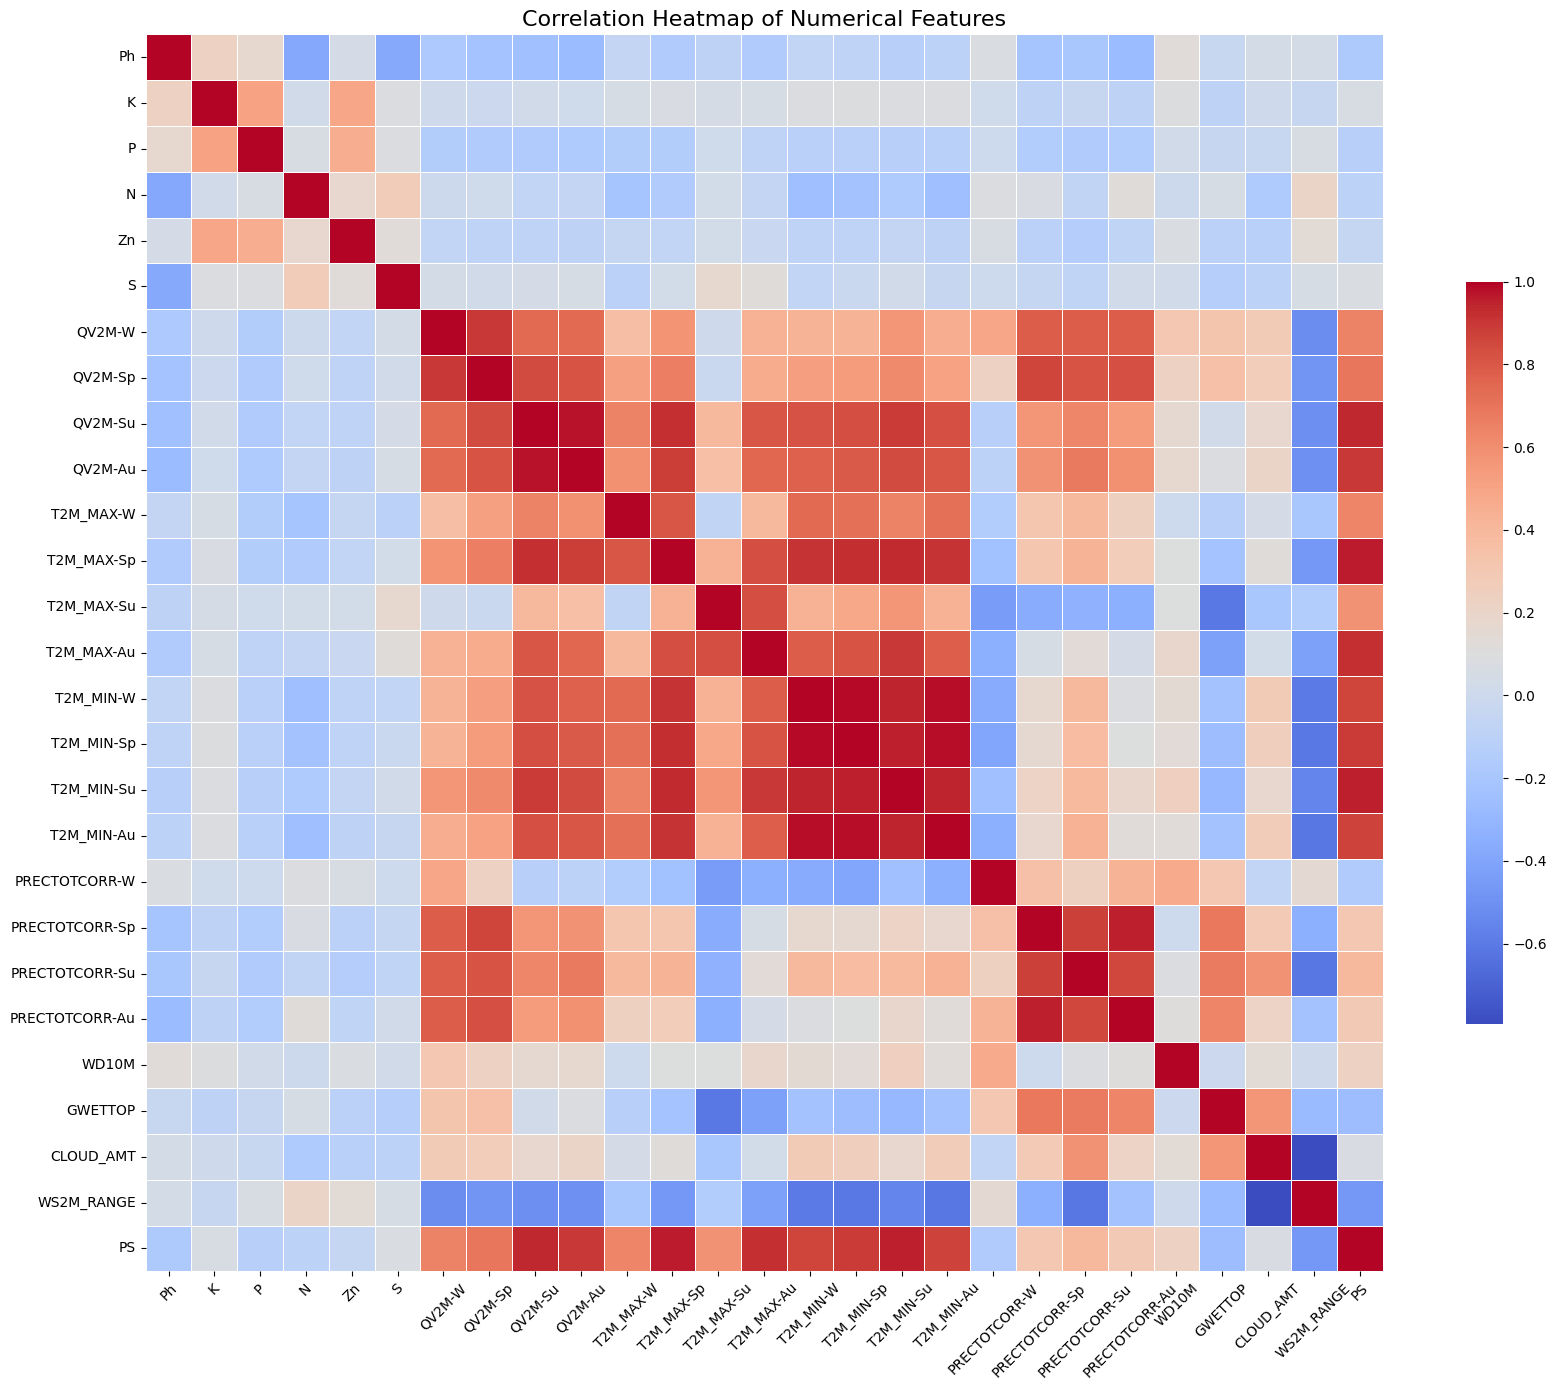

In [14]:
import numpy as np
plt.figure(figsize=(18, 14))

# Compute correlation matrix for numerical features
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5, square=True, cbar_kws={'shrink': 0.6})
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [15]:
# Show pairs with strong correlation > 0.7 (excluding self-correlation)
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
strong_corr = corr_pairs[(corr_pairs < 1.0) & (corr_pairs > 0.7)]
strong_corr


T2M_MIN-W   T2M_MIN-Sp    0.988759
T2M_MIN-Sp  T2M_MIN-W     0.988759
T2M_MIN-Au  T2M_MIN-W     0.984564
T2M_MIN-W   T2M_MIN-Au    0.984564
T2M_MIN-Sp  T2M_MIN-Au    0.979742
                            ...   
T2M_MAX-W   T2M_MIN-W     0.743169
            T2M_MIN-Sp    0.715446
T2M_MIN-Sp  T2M_MAX-W     0.715446
T2M_MAX-W   T2M_MIN-Au    0.713037
T2M_MIN-Au  T2M_MAX-W     0.713037
Length: 110, dtype: float64

STEP 6: Boxplot Analysis (Feature vs. Crop Type)

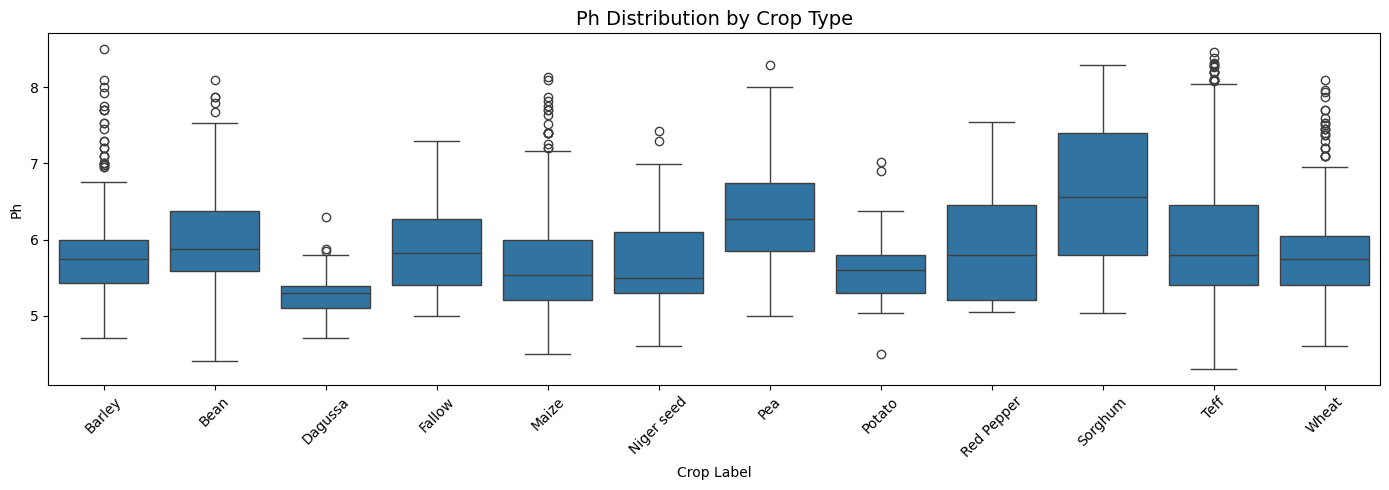

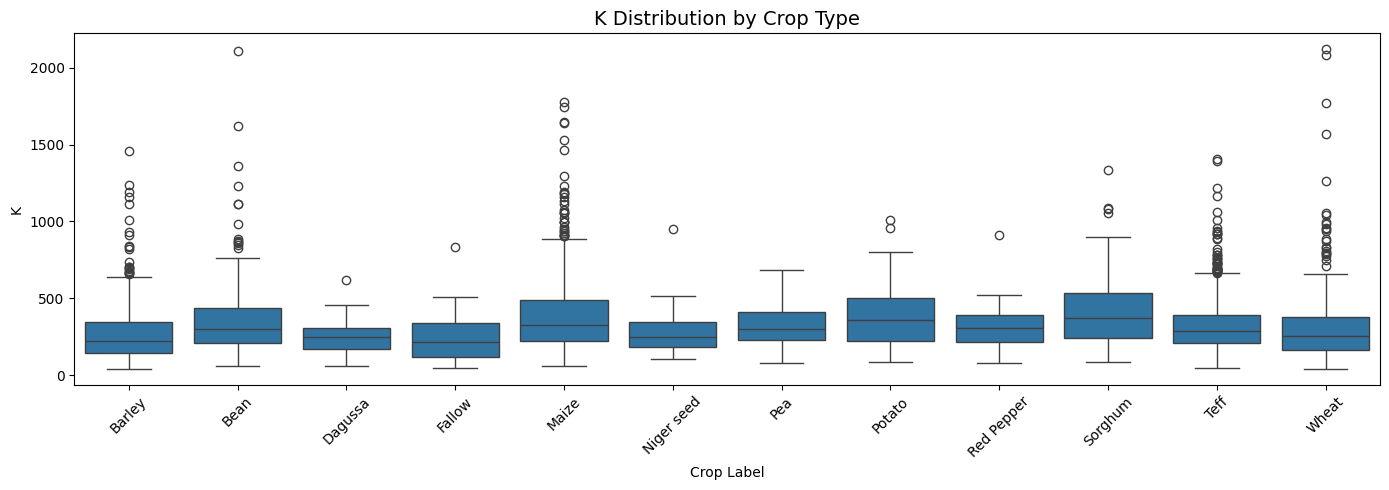

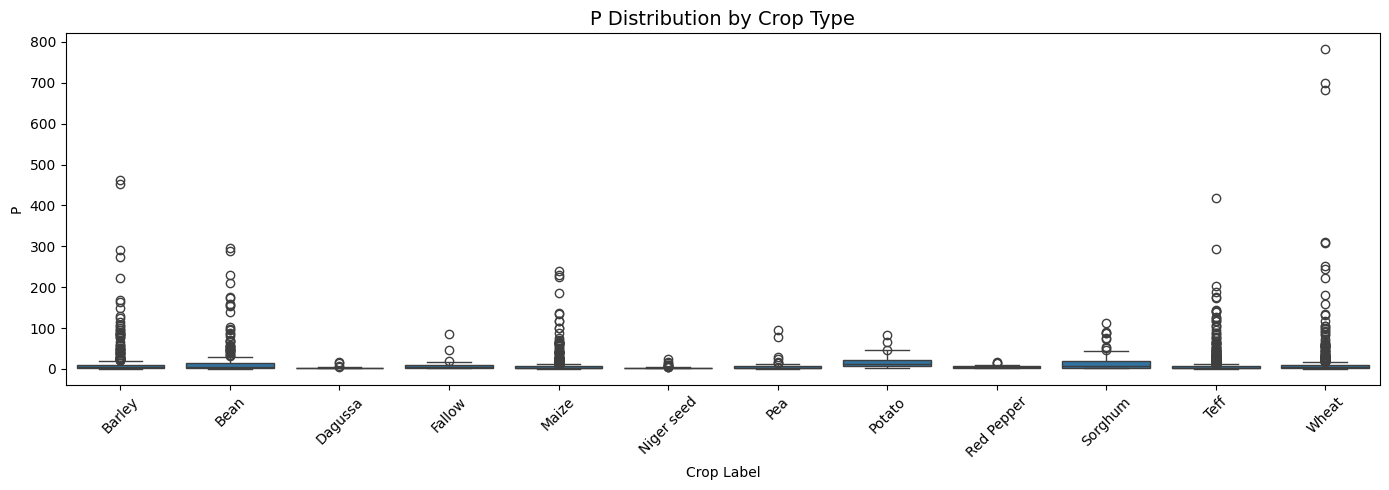

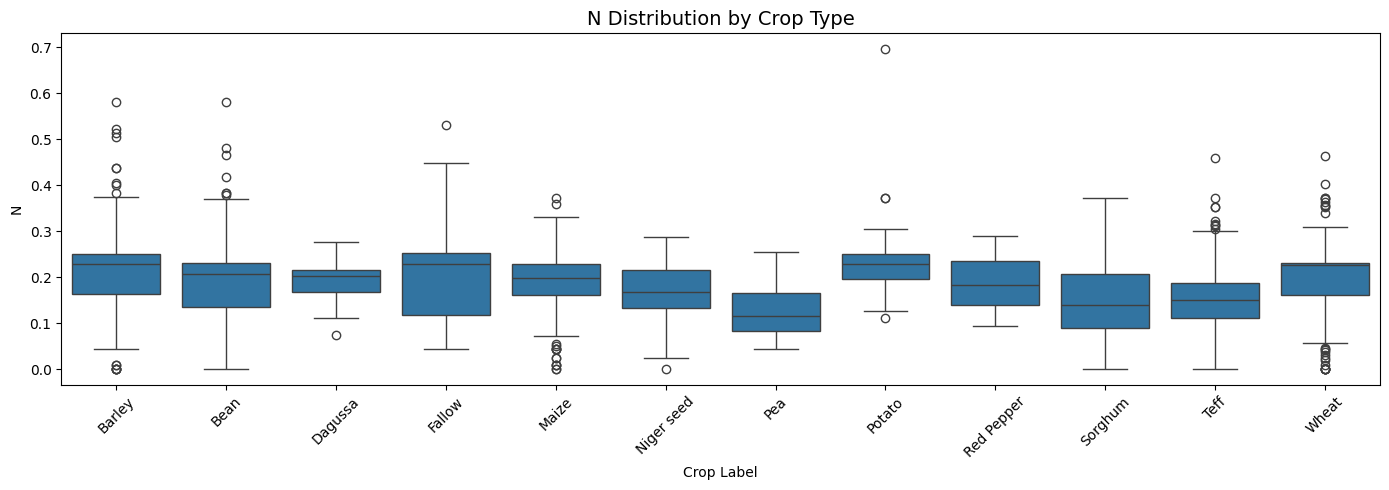

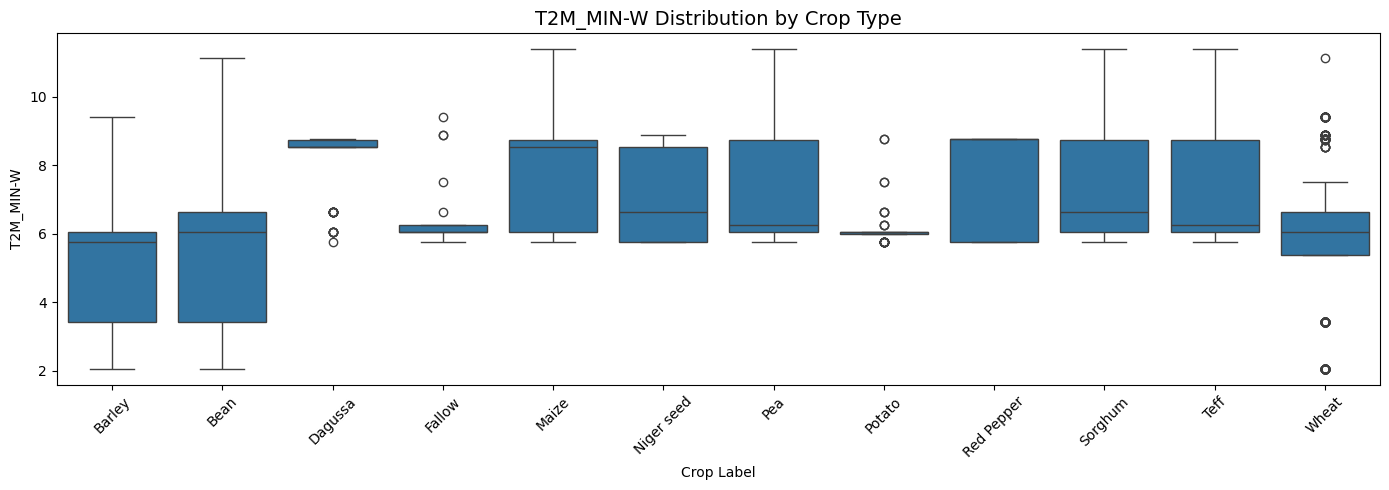

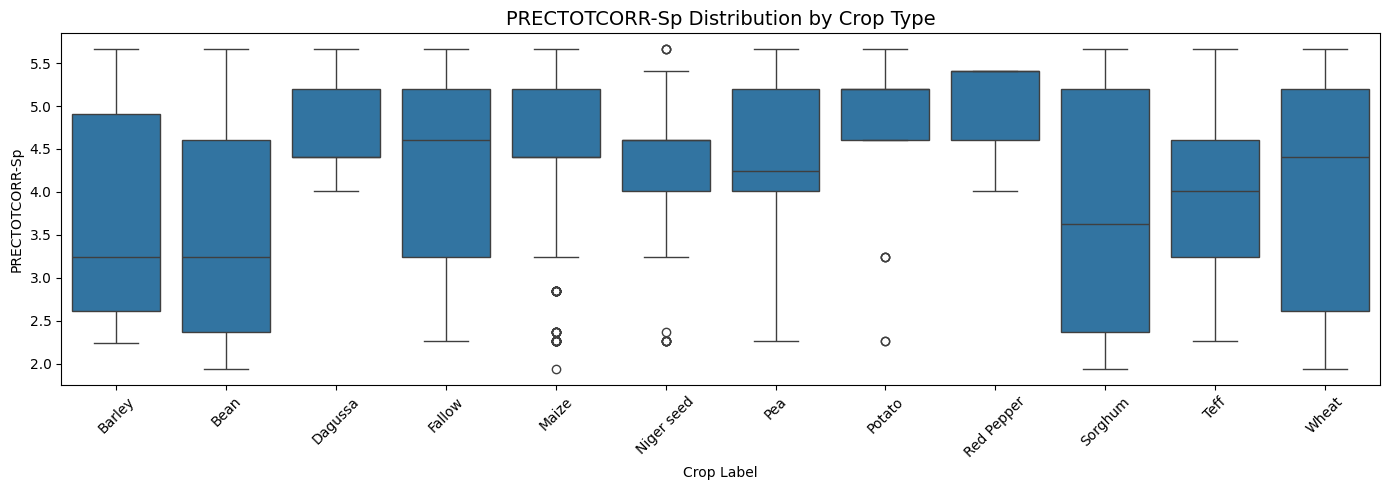

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define list of key features to compare against crops
boxplot_features = ["Ph", "K", "P", "N", "T2M_MIN-W", "PRECTOTCORR-Sp"]

for col in boxplot_features:
    plt.figure(figsize=(14, 5))
    sns.boxplot(x='label', y=col, data=df)
    plt.title(f"{col} Distribution by Crop Type", fontsize=14)
    plt.xticks(rotation=45)
    plt.xlabel("Crop Label")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


STEP 7: Multivariate Analysis – Visualize Feature Interactions

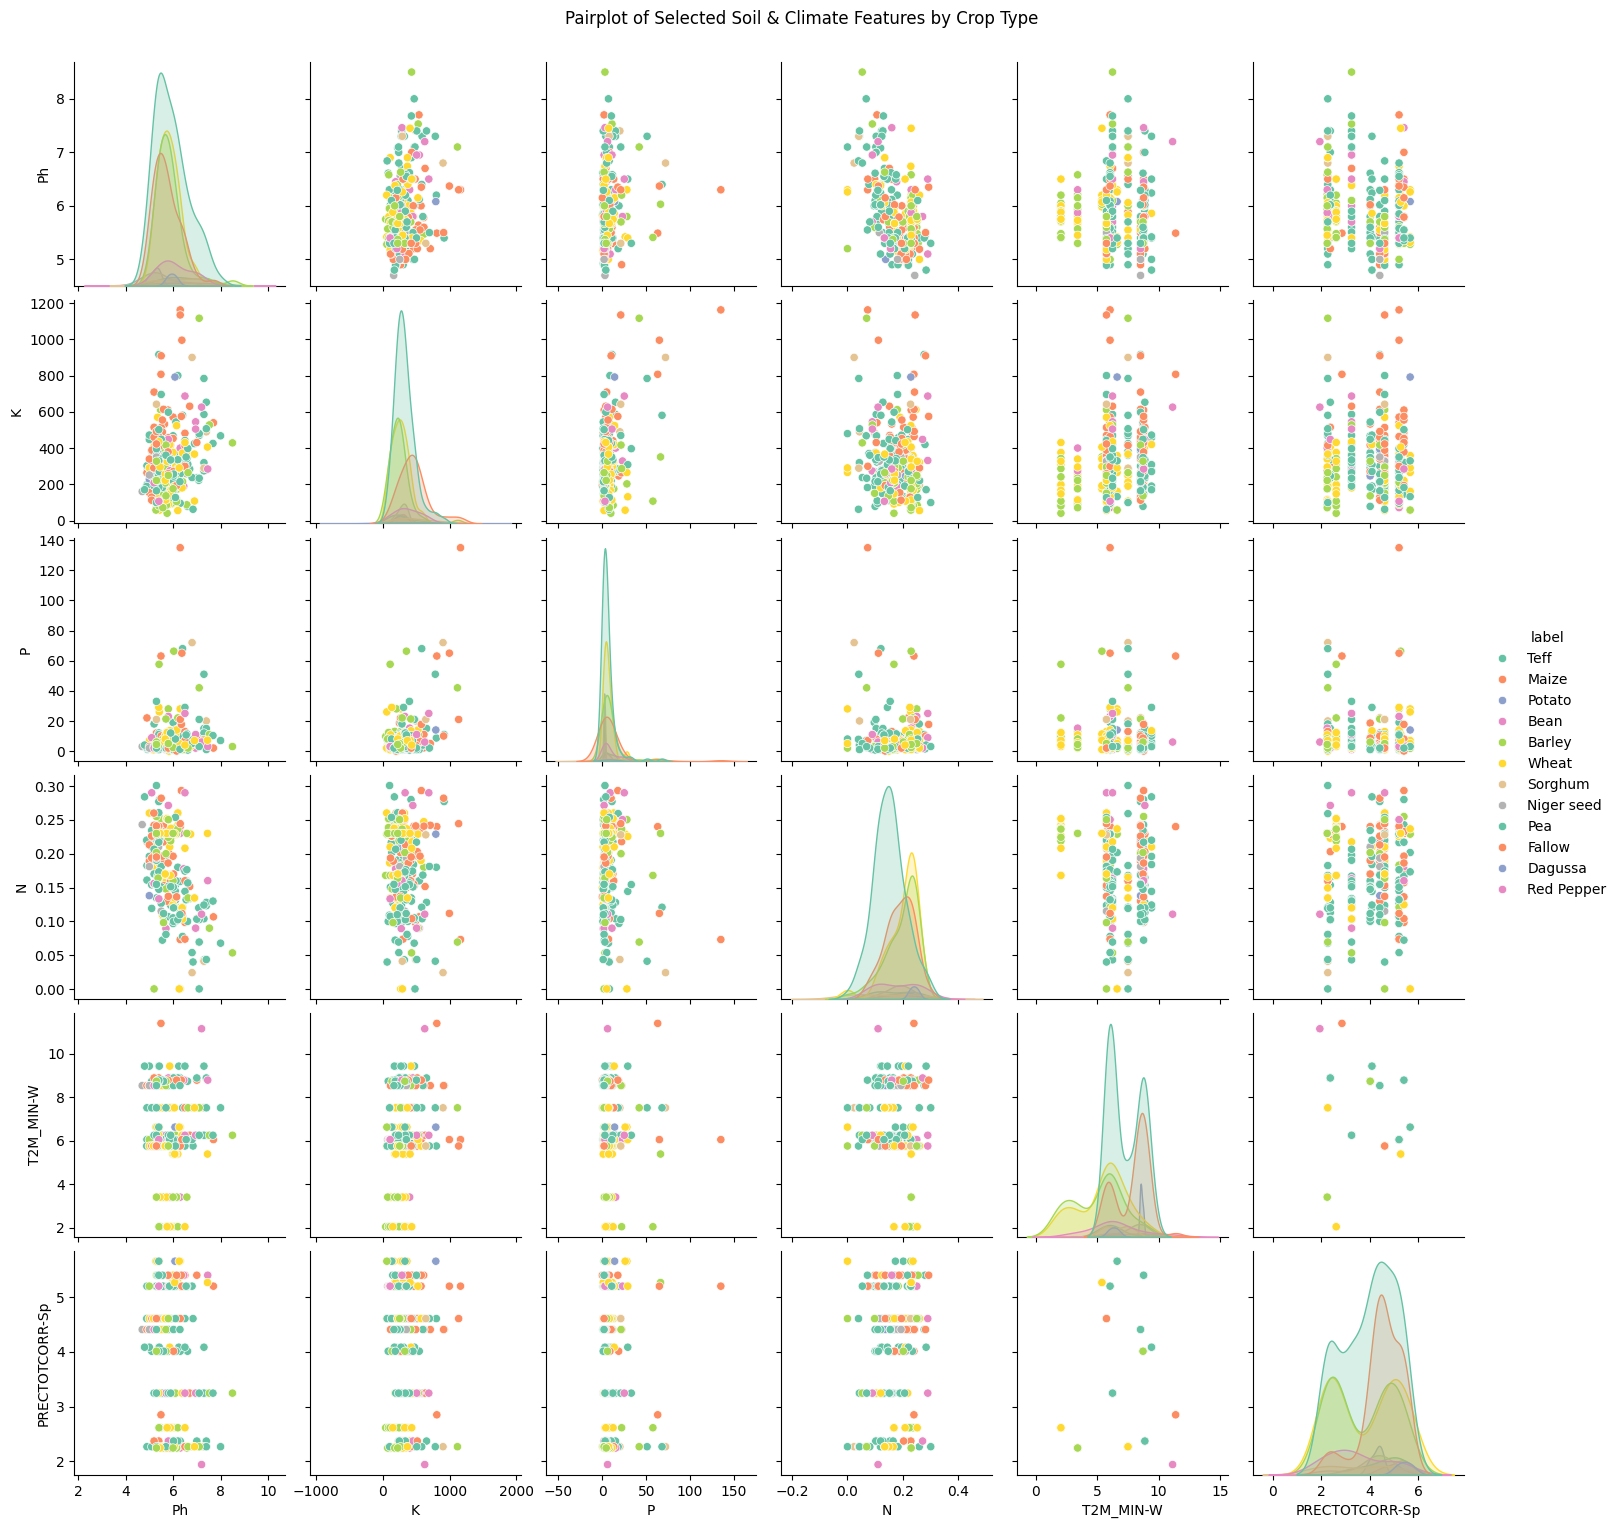

In [17]:
# Pairplot visualization of selected features

import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of features to visualize
selected_features_for_model = [
    "Ph", "K", "P", "N", "T2M_MIN-W", "PRECTOTCORR-Sp", "label"
]

# Sample 300 rows for faster plotting
sample_df = df[selected_features_for_model].sample(n=300, random_state=42)

# Plot pairwise scatter plots
sns.pairplot(sample_df, hue="label", palette="Set2", diag_kind="kde")
plt.suptitle("Pairplot of Selected Soil & Climate Features by Crop Type", y=1.02)
plt.show()


 Step 8: Feature Encoding + Preprocessing

8.1 Encode Categorical Variables

We need to encode:

Soilcolor (categorical input)

label (target crop name)

In [18]:
from sklearn.preprocessing import LabelEncoder

# Copy dataframe to preserve original
df_processed = df.copy()

# Encode 'Soilcolor' as input feature (Keep for consistency with original notebook flow, though not used in the final model features)
le_soil = LabelEncoder()
df_processed["Soilcolor"] = le_soil.fit_transform(df_processed["Soilcolor"])

# Encode 'label' as target
le_crop = LabelEncoder()
df_processed["label"] = le_crop.fit_transform(df_processed["label"])

# For reference later:
print("Soilcolor classes:", list(le_soil.classes_))
print("Crop label classes:", list(le_crop.classes_))

Soilcolor classes: ['Black', 'Brown', 'Dark Brown', 'Dark brown', 'Dark gray', 'Dark greyish brown', 'Dark red', 'Grayish Brown', 'Grayish brown', 'Grayish brown (GB)', 'Light red', 'Lihgtish brown', 'Red', 'Red brown', 'Reddis brown', 'Reddish', 'Reddish broown', 'Reddish brown', 'Reddish gray', 'Redish Brown', 'Redish brown', 'Redishbrown', 'Very dark brown', 'Yellowish Brown', 'Yellowish brown', 'black', 'black;vertisol', 'brown', 'dark brown', 'dark gray', 'dark grayish', 'dark grayish brown', 'dark reddish brown', 'darkbrown', 'gray', 'grayish brown', 'other', 'perl brown', 'red', 'red;luvisols', 'reddish brown', 'reddish brown;moist', 'replacement of inaccessible target red;luvisols', 'very dark brown', 'very dark gray']
Crop label classes: ['Barley', 'Bean', 'Dagussa', 'Fallow', 'Maize', 'Niger seed', 'Pea', 'Potato', 'Red Pepper', 'Sorghum', 'Teff', 'Wheat']


8.2 Define Feature Set (X) and Target (y)

In [28]:
selected_features_for_model = ["Ph", "K", "P", "N"]

# Separate features and target - USE ONLY THE SELECTED FEATURES FOR THE MODEL
X = df_processed[selected_features_for_model]
y = df_processed["label"]

print("Feature shape (selected features):", X.shape)
print("Target shape:", y.shape)

Feature shape (selected features): (3867, 4)
Target shape: (3867,)


STEP 8.3: Standardization, Train/Test Split & SMOTE Balancing

8.3.1: Standardize Numerical Features

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


 8.3.2: Balance Classes Using SMOTE
 SMOTE creates synthetic data points for underrepresented crop classes.

In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
# Use the scaled selected features for SMOTE
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("Original shape:", X.shape, y.shape)
print("Resampled shape:", X_resampled.shape, y_resampled.shape)



Original shape: (3867, 4) (3867,)
Resampled shape: (15120, 4) (15120,)


8.3.3: Train/Test Split
We’ll hold back 20% of the data for model evaluation.

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (12096, 4)
Test set shape: (3024, 4)


STEP 9: Model Training & Evaluation

 9.1: Train a Random Forest Classifier
This model is robust to non-linear relationships, handles high-dimensional data well, and works great with multiclass classification tasks like yours.

Accuracy: 0.7721560846560847

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.63      0.65       252
           1       0.70      0.72      0.71       252
           2       0.84      0.89      0.86       252
           3       0.85      0.91      0.88       252
           4       0.62      0.60      0.61       252
           5       0.83      0.91      0.87       252
           6       0.86      0.89      0.87       252
           7       0.88      0.92      0.90       252
           8       0.84      0.96      0.90       252
           9       0.86      0.88      0.87       252
          10       0.54      0.40      0.46       252
          11       0.65      0.54      0.59       252

    accuracy                           0.77      3024
   macro avg       0.76      0.77      0.76      3024
weighted avg       0.76      0.77      0.76      3024



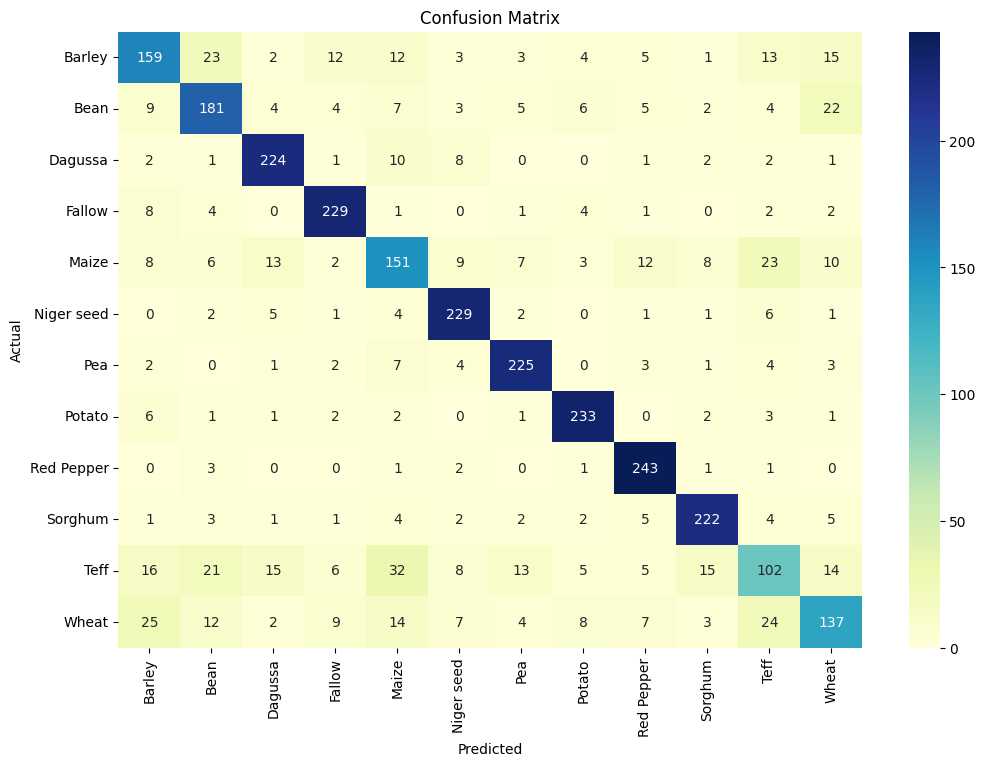

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the model
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
# Get all possible classes from the original label encoder for plotting the full matrix
all_crop_classes = le_crop.classes_
cm = confusion_matrix(y_test, y_pred, labels=np.arange(len(all_crop_classes))) # Use all labels

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=all_crop_classes, yticklabels=all_crop_classes) # Use all label names
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [34]:
selected_features_for_model = ["Ph", "K", "P", "N"] # Redefine or ensure access

def recommend_crop(model, scaler, input_dict, label_encoder):
    """
    Predict best crop using selected soil and climate features.
    """
    # Create DataFrame from input dictionary
    input_df = pd.DataFrame([input_dict])

    # Ensure input_df contains *only* the selected features and in the correct order.
    # If a feature is missing in input_dict, this will raise a KeyError.
    # If there are extra features in input_dict, they will be ignored.
    try:
        input_df = input_df[selected_features_for_model]
    except KeyError as e:
        print(f"Error: Missing required input feature(s) in the provided dictionary: {e}")
        print(f"Please provide values for all of the following features: {selected_features_for_model}")
        raise # Re-raise the error

    # Scale the input features using the pre-fitted scaler
    # This scaler was fitted ONLY on selected_features_for_model
    scaled_input = scaler.transform(input_df)

    # Predict probabilities using the trained model
    probs = model.predict_proba(scaled_input)[0]

    # Get the crop names corresponding to the probabilities
    crop_names = label_encoder.inverse_transform(np.arange(len(probs)))

    # Create a DataFrame of crops and their probabilities
    prob_df = pd.DataFrame({'Crop': crop_names, 'Probability': probs}).sort_values(by='Probability', ascending=False).reset_index(drop=True)

    # Get the top recommended crop and its probability
    top_crop = prob_df.loc[0, 'Crop']
    top_probability = prob_df.loc[0, 'Probability']

    return top_crop, top_probability, prob_df

In [25]:
input_features = {
    "Ph": 6.2,
    "K": 250,
    "P": 12,
    "N": 0.22,
}

In [35]:
recommended_crop, confidence, all_probs = recommend_crop(rf, scaler, input_features, le_crop)

print(f" Recommended Crop: {recommended_crop} (Confidence: {confidence:.2%})")
print("\n Top 5 Crop Probabilities:")
print(all_probs.head(5))

 Recommended Crop: Barley (Confidence: 31.00%)

 Top 5 Crop Probabilities:
     Crop  Probability
0  Barley         0.31
1    Bean         0.23
2   Wheat         0.16
3    Teff         0.12
4   Maize         0.10


In [36]:
import pickle

# Save the trained Random Forest model to a pickle file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Save the fitted StandardScaler to a pickle file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the fitted LabelEncoder for crop labels to a pickle file
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le_crop, f)

print("Model, scaler, and label encoder saved as pickle files.")

Model, scaler, and label encoder saved as pickle files.
